![image info](https://ineuron.ai/images/ineuron-logo.png)

# Data Pre-Processing

#### Import Packages and CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv(r"./data/Visadataset.csv")
# Print shape of dataset
print(df.shape)

(25480, 12)


## Data Cleaning

### Handling Missing values

* Handling Missing values 
* Handling Duplicates
* Check data type
* Understand the dataset

#### Check Null Values

In [2]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

* **There are no null values in the dataset**

### 3.2 Other Data Cleaning steps

**Handling Duplicates**

In [3]:
df.duplicated().sum()

0

* **No Duplicates in the dataset**

**Remove case_id from the dataset as it cannot used in Model Training**

In [4]:
df.drop('case_id', inplace=True, axis=1)

# Feature Engineering

## Feature Extraction

In [5]:
# importing date class from datetime module
from datetime import date
  
# creating the date object of today's date
todays_date = date.today()
current_year= todays_date.year

**Subtract current year with year of estab to get company's age**

In [6]:
df['company_age'] = current_year-df['yr_of_estab']

In [7]:
df

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,15
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,20
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,14
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,125
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,17
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,14
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,16
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,112
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,135


In [8]:
df.drop('yr_of_estab', inplace=True, axis=1)

### Type of Features

**Numeric Features**

In [9]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 3


**Categorical Features**

In [10]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 8


**Discrete features**

In [11]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 0


**Continues Features**

In [12]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 3


**Checking Skewness**

In [13]:
df[continuous_features].skew(axis=0, skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

* No of employees and Copmany age column is skewed

## Feature Transformation

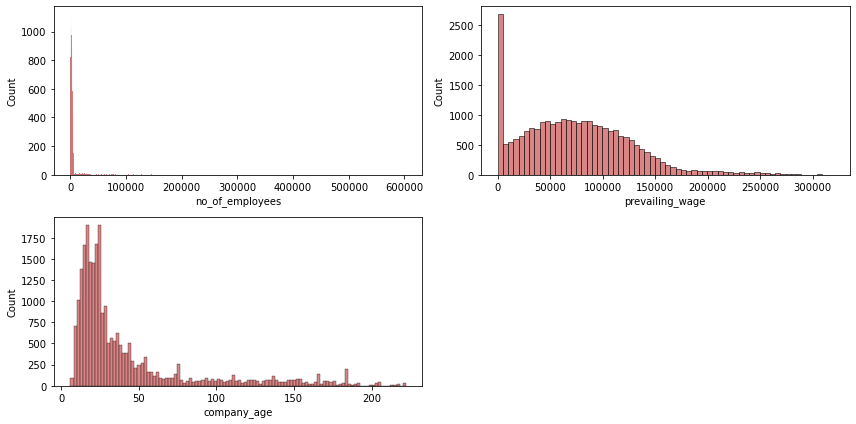

In [14]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(['no_of_employees','prevailing_wage','company_age']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=df[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

- Positiviely Skewed : company_age, no_of_employees

**Log Transformation**

**What is Skewness ?**

* Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

In [15]:
#Applying Log Transformation
df[['no_of_employees','company_age']] = df[['no_of_employees','company_age']].apply(np.log1p)

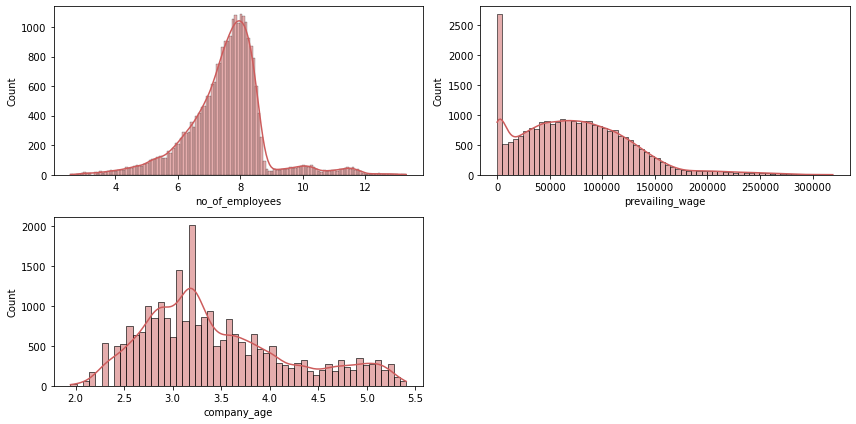

In [16]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(['no_of_employees','prevailing_wage','company_age']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=df[col], color='indianred', kde=True)
    plt.xlabel(col)
    plt.tight_layout()

**Checking skewness after log transformation**

In [17]:
df[continuous_features].skew(axis=0, skipna=True)

no_of_employees    0.156309
prevailing_wage    0.755776
company_age        0.737479
dtype: float64

**Dropping NA**

In [18]:
df.dropna(axis=0, inplace=True)
df.shape

(25447, 11)

## Feature Encoding and Scaling

**Manual encoding for ordered education column**

In [19]:
encoded = {"education_of_employee": {"High School": 0,"Bachelor's": 1, "Master's": 2, "Doctorate":3}}
df = df.replace(encoded)

**Selecting number features for preprocessing**

In [20]:
num_features = list(df.select_dtypes(exclude="object").columns)
del_list=['education_of_employee']
for i in del_list:
    num_features.remove(i)
num_features

['no_of_employees', 'prevailing_wage', 'company_age']

**Manual encoding target column**

In [21]:
df['case_status']= np.where(df.case_status == 'Denied', 1,0)

### Split X and Y

* **Split Dataframe to X and y**
* **Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “ProdTaken” column.**


In [22]:
X = df.drop('case_status', axis=1)
y = df['case_status']

 **One Hot Encoding for Columns which had lesser unique values and not ordinal**
* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

**Ordinal Encoding for Columns which has many unique categories** 
* Ordinal encoding is used here as label encoder is supported for column transformer.
* Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

**MinMax Scaler** 
* MinMaxScaler scales the data based on minimum and maximum value in the data. So by default it would bring values in range of 0 to 1, This is better for KMeans as it works based on distances between data points 

**Preprocessing using Column Transformer**

In [23]:
# Create Column Transformer with 3 types of transformers
or_columns = ['has_job_experience','requires_job_training','full_time_position']
oh_columns = ['continent','unit_of_wage','region_of_employment']

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = MinMaxScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", oh_transformer, oh_columns),
         ("Ordinal encoder", ordinal_encoder, or_columns),
          ("Minmax", numeric_transformer, num_features)
    ]
)

**Scaling the X and saving it as X_scaled**

In [24]:
X_scaled = preprocessor.fit_transform(X)

# Clustering

## K-Means

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

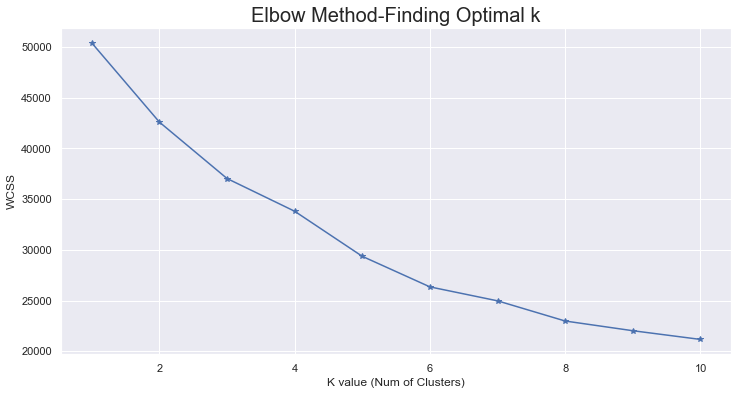

In [25]:
# model building, elbow method
from sklearn.cluster import KMeans
wcss= {}
sns.set()
plt.figure(figsize=(12,6))
for i in range(1,11): 
    km = KMeans(n_clusters=i)
    km.fit(X_scaled)
    wcss[i]=km.inertia_

plt.plot(range(1,11),wcss.values(), marker='*')
plt.title('Elbow Method-Finding Optimal k', fontsize =20)
plt.xlabel('K value (Num of Clusters)')
plt.ylabel('WCSS')
plt.show()

### **Kneedle algorithm**
* We’ll use the Kneedle algorithm here via Kevin Arvai’s excellent Python implementation called Kneed. You can download this via PyPi by entering `pip3 install kneed` into your terminal and then importing the package with `from kneed import KneeLocator`.

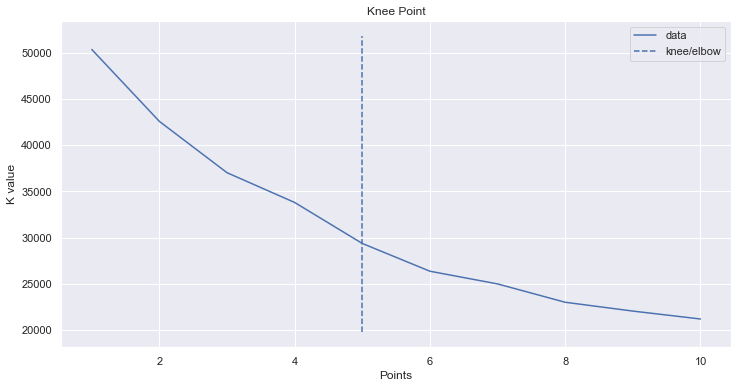

Knee Locator k = 5


In [26]:
from kneed import KneeLocator
kn = KneeLocator(x=list(wcss.keys()), 
                 y=list(wcss.values()), 
                 curve='convex', 
                 direction='decreasing',
                 interp_method='polynomial'
                )
kn.plot_knee(figsize=(12,6))
plt.xlabel("Points")
plt.ylabel("K value")
plt.show()
k = kn.knee
print('Knee Locator k =', k)

In [27]:
# Reducing the dimensions of the data for visualization
from sklearn.decomposition import PCA
pca=PCA(n_components=2,random_state=10)

reduced=pca.fit_transform(X_scaled)

pcadf = pd.DataFrame(reduced) 
pcadf.columns = ['PC1', 'PC2'] 
  
pcadf.head(10)

,PC1,PC2
0,-0.008072,-0.142428
1,-0.311312,0.812883
2,-0.039091,-0.412426
3,-0.075426,-0.303830
4,0.216775,-0.511757
5,-0.571353,-0.473372
6,-0.569611,-0.493551
7,1.055237,-0.121494
8,-0.553923,-0.011685
9,0.595697,-0.608715


### Apply Kmeans Clustering with 5 clusters

In [28]:
# Fitting the K means
from sklearn.metrics import silhouette_score
km = KMeans(n_clusters=5).fit(X_scaled)
km_label = km.labels_
km_centers = km.cluster_centers_
predict = km.predict(X_scaled)
print('Score: ', silhouette_score(X_scaled, predict) , '-  Inertia: ',km.inertia_)

import pickle
with open('km.pickle', 'wb') as f:
    pickle.dump(km, f)

Score:  0.2925016501066079 -  Inertia:  29005.03855380107


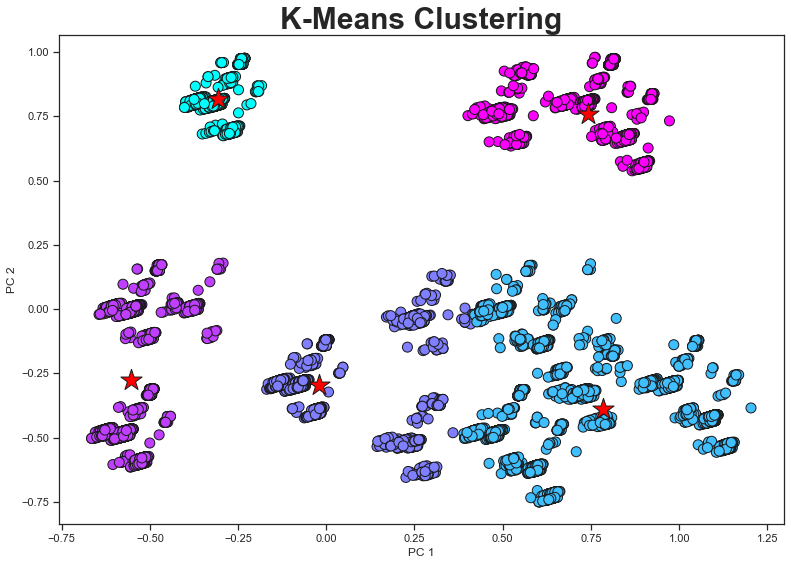

In [29]:
sns.set_style('ticks')
# Fitting the model
model = KMeans(n_clusters=5).fit(pcadf)
model_label = model.labels_
model_centers = model.cluster_centers_
#Plotting the clusters
plt.figure(figsize=(13,9))
plt.title('K-Means Clustering', weight='bold', size=30)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
scatter = plt.scatter(pcadf['PC1'], pcadf['PC2'], c=model_label, s=100, ec='k',cmap='cool')
plt.scatter(model_centers[:,0], model_centers[:,1], c='red', marker='*',s=500, ec='k')
plt.show()

In [30]:
df["cluster"] = km.labels_.astype(int)

In [31]:
list_of_clusters= sorted(list(df.cluster.unique()))
list_of_clusters

[0, 1, 2, 3, 4]

# Classification

**Pre processing for Classification algorithms**

In [32]:
# Create Column Transformer with 3 types of transformers
le_columns = ['has_job_experience','requires_job_training','full_time_position']
oh_columns = ['continent','unit_of_wage','region_of_employment']

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

preprocessor1 = ColumnTransformer(
    [
         ("OneHotEncoder", oh_transformer, oh_columns),
         ("Le_Encoder", ordinal_encoder, le_columns),
          ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

models = {
    "Random Forest": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
}

In [34]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN

# use SMOTEENN for making class of each clusters balanced
smt = SMOTEENN(random_state=42,sampling_strategy='minority')

# Initialize empty list to store report
accuracy=[]
modelname=[]
cluster_no=[]

# Looping through each clusters
for i in list_of_clusters:
    cluster_data=df[df['cluster']==i] # filter the data for one cluster

    # Prepare the Train and Test columns
    X=cluster_data.drop(['cluster', 'case_status'],axis=1)
    y= cluster_data['case_status']
    
    # Fit transform with column transformer
    X = preprocessor1.fit_transform(X)

    # Resampling the minority class.
    # Fit the model to generate the data.
    X_res, y_res = smt.fit_resample(X, y)

    # splitting the data into training and test set for each cluster one by one
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=46)
    

    print(f'Cluster Number {i} Result')
    
    # looping through models and training
    for j in range(len(list(models))):
        model = list(models.values())[j]
        model.fit(X_train, y_train) # Train model
        
        # Make predictions
        y_test_pred = model.predict(X_test)
        
        # Test set performance
        model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
        model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
        model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
        model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
        model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc
        
        # Appending the result to lists
        accuracy.append(model_test_accuracy)
        modelname.append(list(models.keys())[j])
        cluster_no.append(i)
        
        # Printing the report
        print(list(models.keys())[j])
        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print('\n')

    print('='*35)

Cluster Number 0 Result
Random Forest
Model performance for Test set
- Accuracy: 0.9056
- F1 score: 0.9055
- Precision: 0.9140
- Recall: 0.9246
- Roc Auc Score: 0.9018


XGBClassifier
Model performance for Test set
- Accuracy: 0.8533
- F1 score: 0.8528
- Precision: 0.8624
- Recall: 0.8899
- Roc Auc Score: 0.8461


CatBoosting Classifier
Model performance for Test set
- Accuracy: 0.8634
- F1 score: 0.8629
- Precision: 0.8708
- Recall: 0.8986
- Roc Auc Score: 0.8565


Cluster Number 1 Result
Random Forest
Model performance for Test set
- Accuracy: 0.9471
- F1 score: 0.9470
- Precision: 0.9476
- Recall: 0.9660
- Roc Auc Score: 0.9421


XGBClassifier
Model performance for Test set
- Accuracy: 0.9119
- F1 score: 0.9117
- Precision: 0.9211
- Recall: 0.9345
- Roc Auc Score: 0.9059


CatBoosting Classifier
Model performance for Test set
- Accuracy: 0.9060
- F1 score: 0.9064
- Precision: 0.9372
- Recall: 0.9053
- Roc Auc Score: 0.9062


Cluster Number 2 Result
Random Forest
Model performance fo

## Model report as DataFrame

**Results of All Models**

In [35]:
report=pd.DataFrame(list(zip(accuracy,modelname,cluster_no)),columns=['Accuracy','Model', 'Cluster_no'])
viz=report.groupby(['Cluster_no','Model']).max()
viz

Accuracy
Cluster_no Model                           
0          CatBoosting Classifier  0.863406
           Random Forest           0.905565
           XGBClassifier           0.853288
1          CatBoosting Classifier  0.906021
           Random Forest           0.947137
           XGBClassifier           0.911894
2          CatBoosting Classifier  0.875000
           Random Forest           0.920455
           XGBClassifier           0.886364
3          CatBoosting Classifier  0.819263
           Random Forest           0.907253
           XGBClassifier           0.845422
4          CatBoosting Classifier  0.906977
           Random Forest           0.941860
           XGBClassifier           0.906977

## Visualization with results

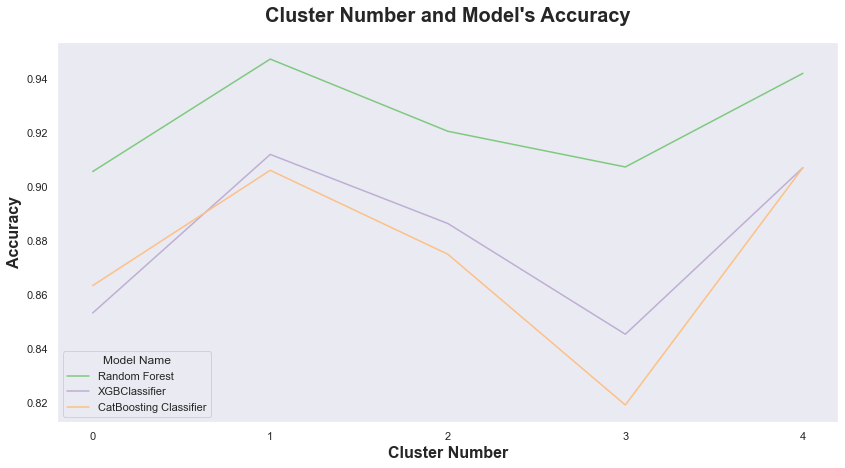

In [36]:
sns.set_style('dark')
plt.subplots(figsize=(14,7))
sns.lineplot(x="Cluster_no",
             y="Accuracy",
             hue="Model",
             data=report,
             palette="Accent", markers=True)
plt.title("Cluster Number and Model's Accuracy", weight="bold",fontsize=20, pad=20)
plt.ylabel("Accuracy", weight="bold", fontsize=16)
plt.xlabel("Cluster Number", weight="bold", fontsize=16)
plt.xticks([0,1,2,3,4])
plt.legend(title="Model Name", fancybox=True)
plt.show()

**Report**
* Here Random forest has performed well in every clusters consistently.
* So we can use Random forest and do hyperparameter tuning and finalize the model

**Here we can use Random Forest for Hyper Parameter Tuning**

**Define the parameter distribution for Random forest**

In [37]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
criterion = ["gini", "entropy", "log_loss"]
# Create the random grid
rf_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion}

In [38]:
# Models list for Hyperparameter tuning
randomcv_model = [("RF", RandomForestClassifier(), rf_params)]

**Create a function for model training and report which can be used in hyperparameter tuning loop**

In [41]:
def Randomforest(params, X_train, y_train, X_test, y_test):
    model=RandomForestClassifier(**params, n_jobs=-1)
    rfmodel = model.fit(X_train,y_train)
    y_pred = rfmodel.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    return score

**Loop through each clusters and running hyperparameter tuning and retrain the model with best parameters**

In [42]:
from sklearn.model_selection import RandomizedSearchCV

score = []
cluster=[]
for i in list_of_clusters:
    cluster_data=df[df['cluster']==i] # filter the data for one cluster

    # Prepare the feature and Label columns
    X=cluster_data.drop(['cluster', 'case_status'],axis=1)
    y= cluster_data['case_status']
    
    X = preprocessor1.fit_transform(X)

    # Resampling the minority class. The strategy can be changed as required.
    # Fit the model to generate the data.
    X_res, y_res = smt.fit_resample(X, y)

    # splitting the data into training and test set for each cluster one by one
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=46)
    
    model_param = {}
    for name, model, params in randomcv_model:
        random = RandomizedSearchCV(estimator=model,
                                       param_distributions=rf_params,
                                       n_iter=50,
                                       cv=3,
                                       verbose=2,
                                       n_jobs=-1)
        random.fit(X_train, y_train)
        model_param[name] = random.best_params_
        accuracy = Randomforest(random.best_params_, X_train, y_train, X_test, y_test)
        score.append(accuracy)
        cluster.append(i)
        
        print(f"Cluster number {i}")
        
    for model_name in model_param:
        print(f"---------------- Best Params for {model_name} Cluster {i} -------------------")
        print(model_param[model_name])
        print(f"Accuracy Score is {accuracy}")
        print("="*50)
        print('\n')

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Cluster number 0
---------------- Best Params for RF Cluster 0 -------------------
{'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 110, 'criterion': 'gini'}
Accuracy Score is 0.9021922428330523


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Cluster number 1
---------------- Best Params for RF Cluster 1 -------------------
{'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini'}
Accuracy Score is 0.9441997063142438


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Cluster number 2
---------------- Best Params for RF Cluster 2 -------------------
{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy'}
Accuracy Score is 0.9172077922077922


Fitting 3 folds for each of 50 candidates, t

## Random forest report for all clusters

In [43]:
randomforest_report =pd.DataFrame(list(zip(cluster,score)),columns=['Cluster_no', 'Accuracy_score'])
randomforest_report

,Cluster_no,Accuracy_score
0,0,0.902192
1,1,0.944200
2,2,0.917208
3,3,0.908442
4,4,0.947674


## Visualize the accuracy of Model with each clusters

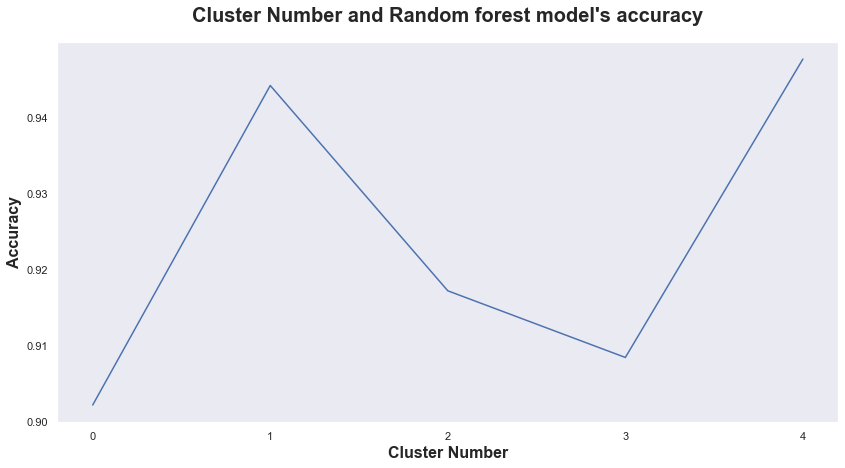

In [44]:
sns.set_style('dark')
plt.subplots(figsize=(14,7))
sns.lineplot(x="Cluster_no",
             y="Accuracy_score",
             data=randomforest_report,
             palette="Accent", markers=True)
plt.title("Cluster Number and Random forest model's accuracy", weight="bold",fontsize=20, pad=20)
plt.ylabel("Accuracy", weight="bold", fontsize=16)
plt.xlabel("Cluster Number", weight="bold", fontsize=16)
plt.xticks([0,1,2,3,4])
plt.show()

**Overall mean Acuuracy for whole dataset**

In [45]:
randomforest_report.Accuracy_score.mean()

0.9239432981037196

### Best Model is Random Forest with 92.4% mean accuracy for 5 clusters